In [1]:
import numpy as np
def compute_vector_length(vector):
    return np.linalg.norm(vector)


In [2]:
def compute_dot_product(vector1, vector2):
    return np.dot(vector1, vector2)


In [3]:
def matrix_multi_vector(matrix, vector):
    return np.dot(matrix, vector)

In [4]:
def maxtrix_multi_matrix(matrix1, matrix2):
    return np.dot(matrix1, matrix2)

In [5]:
def inverse_matrix(matrix):
    return np.linalg.inv(matrix)


In [11]:
def compute_eigenvalues_and_eigenvectors(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    eigenvectors = np.linalg.eig(matrix)[1]
    return eigenvalues, eigenvectors

In [13]:
def compute_cosine(v1,v2):
    numerator = compute_dot_product(v1,v2)
    denominator = np.linalg.norm(v1)*np.linalg.norm(v2)
    return numerator/denominator

In [21]:
import cv2
import matplotlib.pyplot as plt
bg1_image = cv2.imread('GreenBackground.png')
bg1_image = cv2.resize(bg1_image, (678, 381))

bg2_image = cv2.imread('Object.png')
bg2_image = cv2.resize(bg2_image, (678, 381))

bg3_image = cv2.imread('NewBackground.jpg')
bg3_image = cv2.resize(bg3_image, (678, 381))


In [31]:
def compute_difference(image1, image2):
    difference_single_channel = cv2.absdiff(image1, image2)
    difference_single_channel = np.sum(difference_single_channel, axis=2) / 3.0
    difference_single_channel = difference_single_channel.astype('uint8')
    return difference_single_channel

(np.float64(-0.5), np.float64(677.5), np.float64(380.5), np.float64(-0.5))

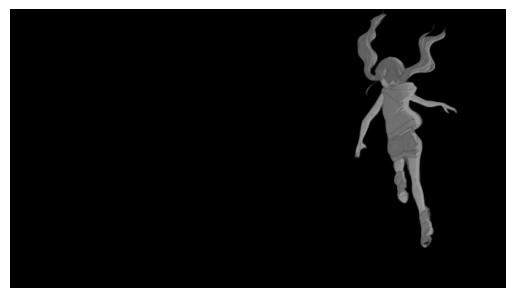

In [32]:
difference_single_channel = compute_difference(bg1_image, bg2_image)
difference_single_channel_rgb = cv2.cvtColor(difference_single_channel, cv2.COLOR_BGR2RGB)
plt.imshow(difference_single_channel_rgb)
plt.axis('off')

In [33]:
def compute_binary_mask(difference_single_channel, threshold=30):
    _, binary_mask = cv2.threshold(difference_single_channel, threshold, 255, cv2.THRESH_BINARY)
    return binary_mask

(np.float64(-0.5), np.float64(677.5), np.float64(380.5), np.float64(-0.5))

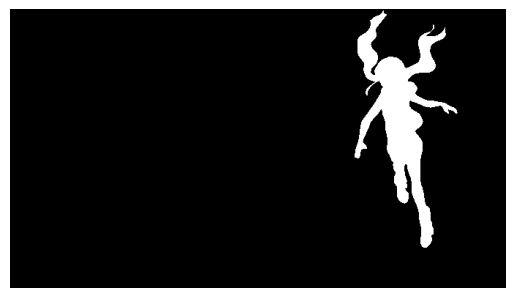

In [35]:
binary_mask = compute_binary_mask(difference_single_channel, threshold=15)
binary_mask_rgb = cv2.cvtColor(binary_mask, cv2.COLOR_BGR2RGB)
plt.imshow(binary_mask_rgb)
plt.axis('off')

In [40]:
def replace_background(bg1_image,bg2_image,ob_image):
    difference_single_channel = compute_difference(bg1_image, ob_image)
    binary_mask = compute_binary_mask(difference_single_channel)

    result = np.where(binary_mask[:, :, np.newaxis] == 255, ob_image, bg2_image)
    return result

(np.float64(-0.5), np.float64(677.5), np.float64(380.5), np.float64(-0.5))

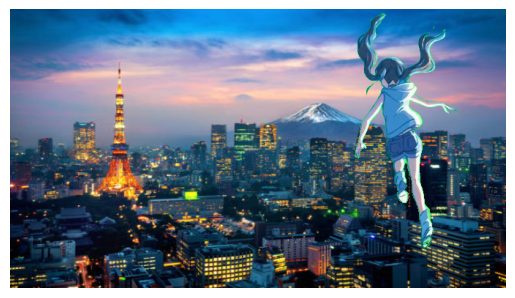

In [42]:
result_image = replace_background(bg1_image, bg3_image, bg2_image)
result_image_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
plt.imshow(result_image_rgb)
plt.axis('off')